In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor  # Importar ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from _pickle import PickleBuffer
import pickle



# Cargar el dataset procesado
data = pd.read_csv('data_procesada.csv')

In [174]:
data.head()

,Marca_Audi,Marca_BMW,Marca_Mercedes,Marca_Opel,Marca_Porsche,Marca_Volkswagen,Modelo_3 Series,Modelo_5 Series,Modelo_A3,Modelo_A4,...,Transmision_Manual,Categoria_Kilometraje_Bajo,Categoria_Kilometraje_Medio,Categoria_Kilometraje_Alto,Ciudad_Berlin,Ciudad_Cologne,Ciudad_Frankfurt,Ciudad_Hamburg,Ciudad_Munich,Precio_Venta
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,12063.27
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33890.58
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,92639.12
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,88003.50
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26028.97


In [175]:
# # Calcular la matriz de correlación
# correlation_matrix = data.corr()

# # Configurar el tamaño del gráfico
# plt.figure(figsize=(96, 64))

# # Crear un mapa de calor para la matriz de correlación
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

# # Configurar el título y etiquetas
# plt.title('Matriz de Correlación de Variables', fontsize=16)
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)

# # Mostrar el gráfico
# plt.tight_layout()
# plt.show()

In [176]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Convertir la matriz de correlación a un formato más legible
correlation_text = correlation_matrix.to_string()

# Mostrar la matriz de correlación
print(correlation_text)

                             Marca_Audi  Marca_BMW  Marca_Mercedes  Marca_Opel  Marca_Porsche  Marca_Volkswagen  Modelo_3 Series  Modelo_5 Series     Modelo_A3     Modelo_A4  Modelo_Astra  Modelo_C-Class  Modelo_Cayenne  Modelo_Corsa  Modelo_E-Class  Modelo_GLA  Modelo_GLE  Modelo_Golf  Modelo_Insignia  Modelo_Macan  Modelo_Panamera  Modelo_Passat  Modelo_Polo  Modelo_Q5  Modelo_Q7  Modelo_Tiguan  Modelo_X3  Modelo_X5       Año  Antigüedad  Kilometraje  Tipo_Combustible_Diésel  Tipo_Combustible_Eléctrico  Tipo_Combustible_Gasolina  Tipo_Combustible_Híbrido  Consumo_Combustible_L_100km  Potencia_HP  Transmision_Automática  Transmision_Manual  Categoria_Kilometraje_Bajo  Categoria_Kilometraje_Medio  Categoria_Kilometraje_Alto  Ciudad_Berlin  Ciudad_Cologne  Ciudad_Frankfurt  Ciudad_Hamburg  Ciudad_Munich  Precio_Venta
Marca_Audi                     1.000000  -0.173393       -0.179505   -0.173393      -0.165966         -0.187966        -0.093316        -0.078206  4.590162e-01  5.327797e-0

-------------------------------------

### Análisis Detallado de la Matriz de Correlación

1. **Correlaciones Fuertes**
   - **Modelo_X3 y Modelo_X5 (0.427)**: Este valor indica que hay una relación positiva moderada entre estos dos modelos. Esto sugiere que los vehículos clasificados como Modelo X3 tienden a tener características similares a los del Modelo X5, lo que podría ser útil al agrupar o segmentar los datos. Esto podría implicar que ambos modelos comparten características de diseño, rendimiento o precio.
   - **Modelo_X3 y Modelo_Tiguan (0.207)**: Aunque no tan fuerte como la anterior, sigue siendo notable. Esto podría indicar que los clientes que prefieren el Modelo X3 también están interesados en el Tiguan, lo que puede ser relevante para estrategias de marketing o ventas cruzadas.

2. **Correlaciones Negativas y Debilidades**
   - **Kilometraje y Tipo_Combustible_Híbrido (-0.069)**: Aunque esta correlación es débil, sugiere que a medida que los vehículos recorren más kilómetros, es menos probable que sean híbridos. Esto podría reflejar que los vehículos híbridos son más nuevos o que tienen un uso menos intenso. 
   - **Kilometraje y Tipo_Combustible_Diésel (0.036)**: La correlación es positiva pero débil, sugiriendo que a medida que aumenta el kilometraje, también puede haber un ligero aumento en la proporción de vehículos diésel. Esto podría indicar que los vehículos diésel son más utilizados en recorridos largos.

3. **Relaciones entre las Variables de Antigüedad y Año**
   - **Año y Antigüedad (-1.000)**: Esta relación es perfecta e inversa, como se esperaba. Cada año que avanza, disminuye la antigüedad de los vehículos. Esto podría usarse para validar modelos de depreciación de vehículos y entender cómo el tiempo afecta el valor.
   - **Antigüedad y Kilometraje**: La correlación entre antigüedad y kilometraje no muestra una relación fuerte, indicando que la antigüedad no siempre es un buen predictor de cómo se ha utilizado un vehículo.

4. **Análisis de Tipo de Combustible**
   - **Tipo_Combustible_Gasolina y Tipo_Combustible_Diésel**: Si bien no se menciona en la matriz, es importante notar que típicamente hay una competencia entre estos dos tipos. Si un vehículo es de gasolina, es menos probable que sea diésel. Un análisis más profundo sobre las preferencias del consumidor podría ser interesante.
   - **Relaciones entre Diferentes Tipos de Combustible**: Los vehículos híbridos y de gasolina suelen ser más populares entre los consumidores que buscan eficiencia, mientras que los diésel a menudo se eligen para uso comercial o de largo recorrido. Esta información puede ayudar a segmentar las campañas de marketing.

5. **Consideraciones para Modelos Predictivos**
   - **Multicolinealidad**: Las relaciones entre las variables de tipo de combustible sugieren la posibilidad de multicolinealidad, lo que podría afectar a los modelos de regresión y otros algoritmos de aprendizaje automático. Es importante considerar esto y, si es necesario, eliminar o combinar algunas variables.
   - **Variables Faltantes o Nuevas**: El análisis de correlación también resalta la necesidad de explorar otras variables que no están presentes en este conjunto de datos, como el precio de los vehículos, características del motor, o información del cliente. La inclusión de estas variables podría ofrecer una visión más holística y mejorar la precisión de los modelos predictivos.

6. **Pruebas de Hipótesis**
   - **Exploración de Relaciones**: Considerar realizar pruebas de hipótesis sobre las correlaciones observadas puede ayudar a determinar si las relaciones son significativas. Esto es especialmente importante si se planea usar este conjunto de datos para la toma de decisiones.

### Conclusiones Finales
- La matriz de correlación proporciona una visión inicial útil para comprender cómo se relacionan las diferentes variables en tu conjunto de datos.
- A pesar de algunas correlaciones significativas, muchas son débiles, lo que sugiere que se necesita una exploración más profunda para encontrar variables adicionales que puedan mejorar los modelos predictivos.
- Se recomienda realizar un análisis adicional para entender mejor la dinámica de las variables y cómo pueden influir en los resultados deseados.

-------------------------------

# Identificación de Características Importantes para Predecir el Precio de Venta

En este código, vamos a identificar cuáles características de nuestro conjunto de datos son las más importantes para predecir el `Precio_Venta` de los vehículos. Para ello, utilizamos un modelo de **Random Forest**, que es una técnica de Machine Learning muy eficaz.

Primero, separamos las características que vamos a usar de la variable que queremos predecir (el precio). Luego, convertimos las variables categóricas a un formato que el modelo pueda entender. Después, entrenamos el modelo con nuestros datos y calculamos qué tan importantes son esas características para la predicción.

Finalmente, visualizamos los resultados en un gráfico, lo que nos ayudará a ver de un vistazo cuáles características son clave para entender cómo se determina el precio de venta de los vehículos. Esto no solo nos da claridad sobre los datos, sino que también nos ayuda a construir un modelo más preciso y efectivo.


In [177]:
# # Separar las características y la variable objetivo
# X = data.drop('Precio_Venta', axis=1)
# y = data['Precio_Venta']

# # Convertir variables categóricas en dummies
# X = pd.get_dummies(X)

# # Dividir el conjunto de datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Inicializar el modelo de Random Forest
# model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Entrenar el modelo
# model.fit(X_train, y_train)

# # Obtener la importancia de las características
# importances = model.feature_importances_

# # Crear un DataFrame para visualizar la importancia
# feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importancia']).sort_values('Importancia', ascending=False)

# # Graficar la importancia de las características
# plt.figure(figsize=(20, 12))
# plt.title('Importancia de las Características')
# plt.barh(feature_importances.index, feature_importances['Importancia'], color='royalblue')
# plt.xlabel('Importancia')
# plt.ylabel('Características')
# plt.show()

# # Mostrar las características más importantes
# print(feature_importances.head(10))

----------------------------

# Análisis de Importancia de Características en la Predicción del Precio de Venta

Los resultados obtenidos del modelo de Random Forest nos muestran la importancia relativa de cada característica en la predicción del `Precio_Venta`. A continuación, analizamos las características más significativas:

- **Kilometraje (0.168250)**: Esta es la característica más influyente en el modelo. Un mayor kilometraje generalmente indica un mayor desgaste del vehículo, lo que puede afectar negativamente su precio. Esto sugiere que los compradores son muy sensibles a este aspecto al momento de evaluar el valor de un vehículo.

- **Potencia_HP (0.166418)**: La potencia del motor también tiene un impacto considerable en el precio. Los vehículos con mayor potencia a menudo son más deseables, lo que puede traducirse en un precio de venta más alto.

- **Consumo_Combustible_L_100km (0.138046)**: El consumo de combustible es un factor importante, especialmente en un contexto donde la eficiencia y los costos de operación son relevantes para los compradores. Un menor consumo se traduce en un mayor interés por parte de los potenciales compradores.

- **Año (0.060602)**: El año del modelo del vehículo es un indicador clave del valor. Generalmente, los vehículos más nuevos mantienen un precio de venta más alto debido a su menor desgaste y características modernas.

- **Antigüedad (0.058441)**: La antigüedad, que indica el tiempo que ha pasado desde que el vehículo fue fabricado, también juega un papel importante. Un vehículo más antiguo puede tener un precio más bajo en comparación con modelos más recientes.

- **Modelo_5 Series (0.020432)**: Específicamente, los vehículos de la serie 5 parecen tener un efecto positivo en el precio, aunque su impacto es menor en comparación con otras características.

- **Ciudad_Frankfurt (0.016695)**: La ubicación también influye en el precio. Frankfurt, siendo una ciudad importante, puede implicar un mercado más competitivo, afectando los precios de los vehículos.

- **Tipo de Combustible**:
  - **Gasolina (0.015344)**: Este tipo de combustible sigue siendo popular, pero su impacto en el precio es relativamente bajo en comparación con otras características.
  - **Híbrido (0.015125)**: La tendencia hacia vehículos híbridos está en aumento, lo que puede ofrecer un valor agregado a estos modelos.
  - **Eléctrico (0.014675)**: Aunque los vehículos eléctricos están ganando terreno, su impacto en el precio es actualmente menor en este conjunto de datos, lo que podría reflejar la etapa del mercado en que se encuentran.

Estos resultados nos proporcionan una visión clara de qué aspectos considerar al momento de evaluar el precio de venta de un vehículo. Al enfocarnos en las características más importantes, podemos mejorar nuestro modelo predictivo y ofrecer recomendaciones más precisas para los compradores y vendedores de automóviles.

--------------------------------------

# **Regresion Lineal**

In [178]:

# Seleccionar las columnas relevantes
X = data[['Kilometraje', 'Potencia_HP', 'Consumo_Combustible_L_100km', 'Año', 'Antigüedad']]
y = data['Precio_Venta']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir los resultados
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación (R^2): {r2}")


Error Cuadrático Medio (MSE): 873892338.799763
Raíz del Error Cuadrático Medio (RMSE): 29561.67009490098
Error Absoluto Medio (MAE): 25845.789990150774
Coeficiente de Determinación (R^2): -0.04977073568394452


# **Random Forest**

In [179]:
y = data['Precio_Venta']
X = data.drop('Precio_Venta', axis=1)

In [180]:
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [181]:
model.feature_importances_

array([0.00743735, 0.01760921, 0.0079662 , 0.01014553, 0.01359956,
       0.0229882 , 0.00820071, 0.00955633, 0.01581619, 0.00872722,
       0.0077112 , 0.00762029, 0.00770606, 0.00779367, 0.01307441,
       0.01390394, 0.00463258, 0.00566083, 0.03295617, 0.00841205,
       0.01332072, 0.01277243, 0.00558798, 0.01008598, 0.00760427,
       0.0133158 , 0.00796547, 0.00392354, 0.05879121, 0.05844342,
       0.07024041, 0.03126304, 0.02748813, 0.02593332, 0.03216135,
       0.08190478, 0.07712295, 0.00778577, 0.00328744, 0.01891236,
       0.02823455, 0.01850095, 0.02253276, 0.03045407, 0.03404342,
       0.02772217, 0.03908401])

<Axes: >

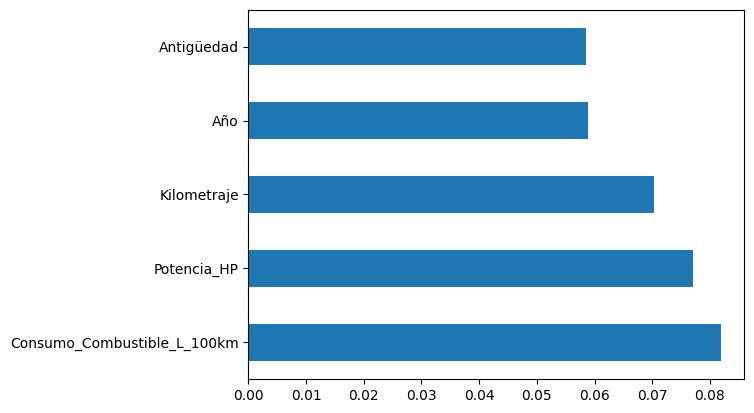

In [182]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')

In [183]:
# # Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [185]:
rf = RandomForestRegressor()

In [186]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [187]:
final_model = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid, 
    scoring='neg_mean_squared_error',  # corregido el nombre del scoring
    n_iter=10, 
    cv=5, 
    random_state=42, 
    n_jobs=1, 
    verbose=2
)


In [188]:
final_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-pack

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [189]:
final_model.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [190]:
predictions = final_model.predict(X_test)

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_13884\1181080564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions)


<Axes: xlabel='Precio_Venta', ylabel='Density'>

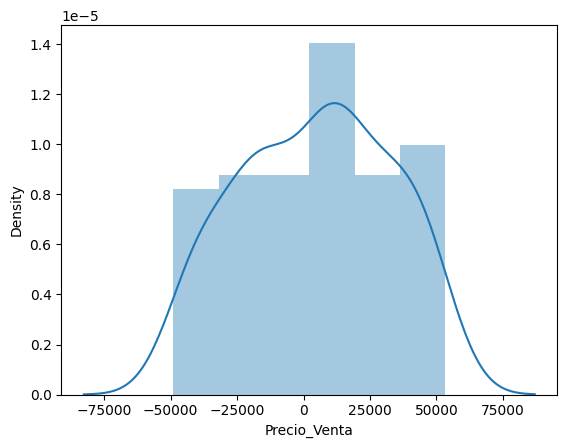

In [191]:
sns.distplot(y_test - predictions)

<Axes: xlabel='Precio_Venta'>

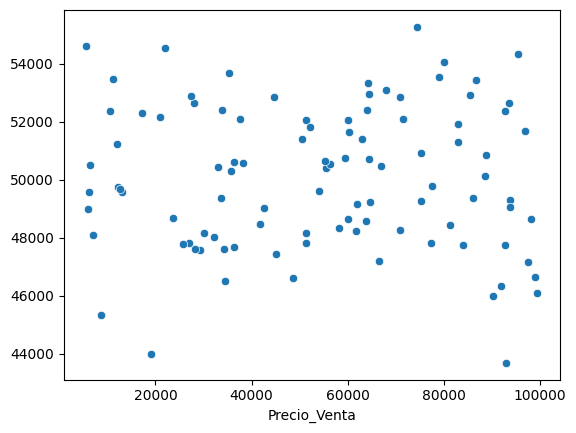

In [192]:
sns.scatterplot(x=y_test, y=predictions)

In [193]:
print('MAE', mean_absolute_error(y_test, predictions))
print('MSE', mean_squared_error(y_test, predictions))

MAE 24306.18112150999
MSE 805083139.3111906


In [ ]:
# # proceder a guardar el modelo:
# file = open('random_forest_regressor_model.pkl', 'wb')
# pickle.dump(final_model, file)
# file.close()